In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

$\textbf{Part 1 : Travelling salesman problem}$

*Travelling salesman problem (TSP) is a very old and interesting optimization problem in which a salesman has to visit a given number of cities. He has to visit all the cities only once and the task is to optimize the his route in such a way that the total distance travelled is minimum. The distance between all the cities and the number of cities are already known, the only task lies at choosing the best route to minimize the distance and not travel to any city more than once.*

$\textbf{Part 2 : Loading the distance data of total 11 cities}$

In [ ]:
distance = np.loadtxt('TSP11.csv', delimiter=',')
distance

array([[  0.,  29.,  20.,  21.,  16.,  31., 100.,  12.,   4.,  31.,  18.],
       [ 29.,   0.,  15.,  29.,  28.,  40.,  72.,  21.,  29.,  41.,  12.],
       [ 20.,  15.,   0.,  15.,  14.,  25.,  81.,   9.,  23.,  27.,  13.],
       [ 21.,  29.,  15.,   0.,   4.,  12.,  92.,  12.,  25.,  13.,  25.],
       [ 16.,  28.,  14.,   4.,   0.,  16.,  94.,   9.,  20.,  16.,  22.],
       [ 31.,  40.,  25.,  12.,  16.,   0.,  95.,  24.,  36.,   3.,  37.],
       [100.,  72.,  81.,  92.,  94.,  95.,   0.,  90., 101.,  99.,  84.],
       [ 12.,  21.,   9.,  12.,   9.,  24.,  90.,   0.,  15.,  25.,  13.],
       [  4.,  29.,  23.,  25.,  20.,  36., 101.,  15.,   0.,  35.,  18.],
       [ 31.,  41.,  27.,  13.,  16.,   3.,  99.,  25.,  35.,   0.,  38.],
       [ 18.,  12.,  13.,  25.,  22.,  37.,  84.,  13.,  18.,  38.,   0.]])

$\textbf{Part 3,4,5 : Using the above distance dataset and the information in the question to define the functions}$

In [ ]:
#defining the cost function
def cost(route, distance):
  assert type(distance) is np.ndarray
  assert distance.shape == (len(route), len(route))
  cost = 0
  for i in range(len(route)-1):
    cost += distance[route[i],route[i+1]]
  return float(cost)


def neighbour(route):
  assert type(route) is np.ndarray
  n = len(route)
  u = np.random.randint(0,len(route))
  copy = route.copy()
  if (u<n-1):
    copy[u] = route[u+1]
    copy[u+1] = route[u]
  else:
    copy[0] = route[-1]
    copy[-1] = route[0]

  return copy
  



$\textbf{Part 6 : Behaviour of the Acceptance probability when,}$

***New cost is worse than current :*** *When the new cost is worse than the current cost, than the probability of acceptance decreases for a given value of temperature $T_k$ at the kth iteration. Since the expresssion in the power of e is $(c - c')1/T_k$* so this expression become negative as the new cost of route increases and since the cost is increasing we should decrease the probability of choosing such models.

***Temperature decreases :*** *Temperature, $T_k$ is acting as the weight parameter of how fast the probability of acceptance/rejection changes. For ex, if the new cost is less than current cost, and $T_k$ is large, then the probability of acceptance is increased by a large quantity. So $T_k$ controls how fast we move towards the optimal point. As we move towards the optimal point we decrease the value of $T_k$ according to the cooling schedule so that we do not overshoot the optimal point.*

In [ ]:
def accept_prob(c_new, c_old, T_k):
  return float(np.exp((c_old - c_new)/T_k))

$\textbf{Part 7,8 : Running the annealing algorithm with the given cooling schedule,}$

In [ ]:
def simulate_annealing(initial_route, distance_matrix, alpha, max_itr):
  T_k = 1
  old_route = initial_route
  old_cost = cost(initial_route,distance_matrix)
  
  cost_k = []
  cost_k.append(old_cost)
  best_route=[]

  for j in range(max_itr):
    new_route = neighbour(old_route)
    new_cost = cost(new_route,distance_matrix)
    cost_k.append(new_cost)
    T_k *= alpha

    if (new_cost <= old_cost):
      old_route = new_route
      old_cost = new_cost
      best_route.append(new_route)
    else:
      u = np.random.rand()
      prob = accept_prob(new_cost, old_cost, T_k)
      if (u<prob):
        old_route = new_route
        old_cost = new_cost
  return cost_k, best_route[-1]





$\textbf{Running the simulation }$

In [ ]:
start_route = np.arange(11)
np.random.shuffle(start_route)
my_alpha = 0.8
my_max_itr = 1000


In [ ]:
cost_arr, best_route = simulate_annealing(start_route, distance, my_alpha,my_max_itr)

In [ ]:
print('The best route is :', best_route)
print('The cost of this route :', cost(best_route,distance))

The best route is : [ 1  2  8  5  6 10  0  7  4  3  9]
The cost of this route : 309.0


Text(0, 0.5, 'Cost')

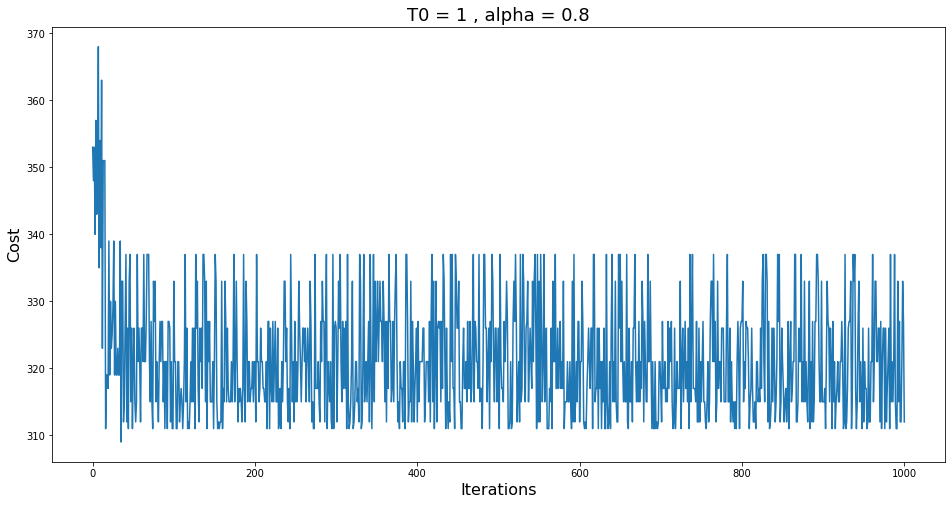

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cost_arr)
plt.title('T0 = 1 , alpha = 0.8', fontsize=18)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)


$\textbf{Running the simulation again with T0 = 1, alpha = 0.5}$

The best route is : [ 1  7  3  9  4  2 10  6  5  0  8]
The cost of this route : 303.0


Text(0, 0.5, 'Cost')

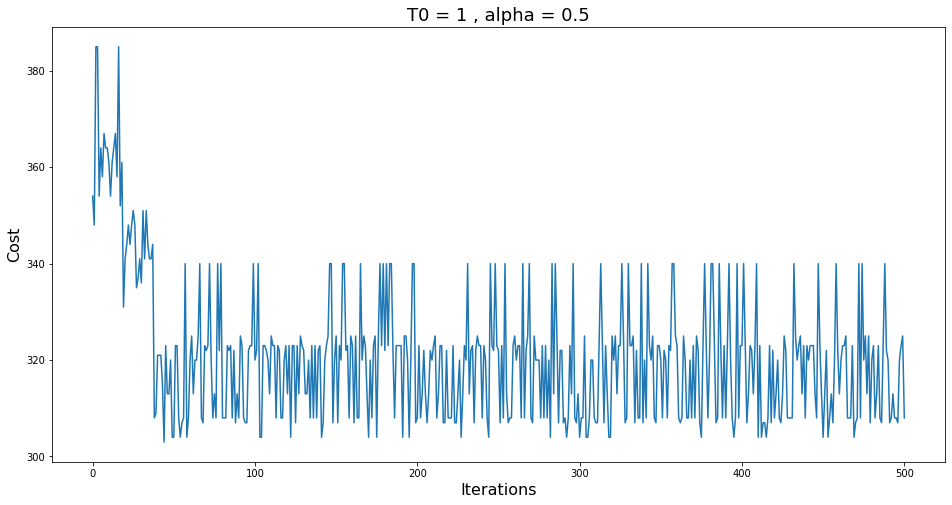

In [ ]:
start_route = np.arange(11)
np.random.shuffle(start_route)
my_alpha = 0.5
my_max_itr = 500


cost_arr, best_route = simulate_annealing(start_route, distance, my_alpha,my_max_itr)

print('The best route is :', best_route)
print('The cost of this route :', cost(best_route,distance))

plt.figure(figsize=(16,8))
plt.plot(cost_arr)
plt.title('T0 = 1 , alpha = 0.5', fontsize=18)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)


$\textbf{Part 10 : Doing same for 48 cities}$

In [ ]:
distance_48 = np.loadtxt('TSP48.csv', delimiter=',')


The best route is : [44 47 38 22 33 40 10 43 30  7 11 31  4 12 45 16 18  5 35  2 23 25 15 27
 36 29  3  0 21 28 39 32 24  9 19 42 37 41 46 26 17  1 34 20 13 14  8  6]
The cost of this route : 119370.0


Text(0, 0.5, 'Cost')

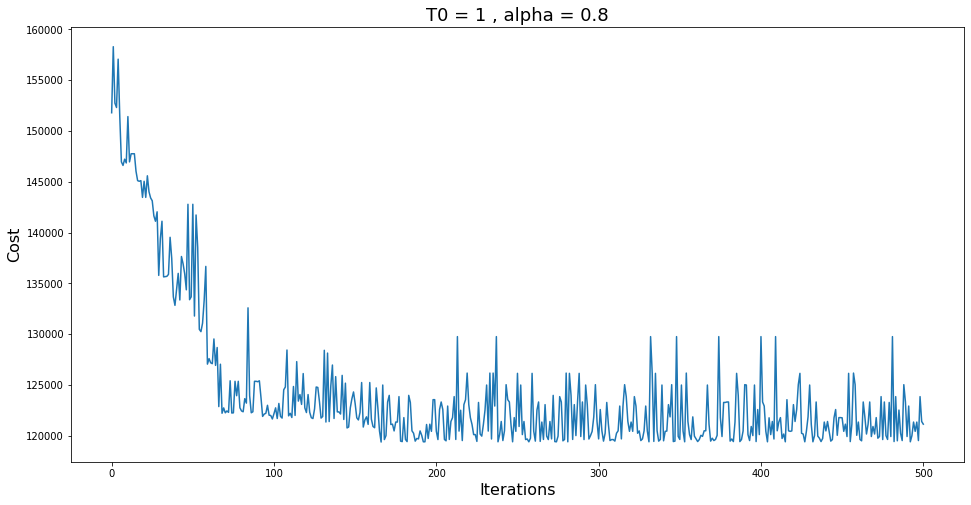

In [ ]:
start_route = np.arange(48)
np.random.shuffle(start_route)
my_alpha = 0.8
my_max_itr = 500


cost_arr, best_route = simulate_annealing(start_route, distance_48, my_alpha,my_max_itr)

print('The best route is :', best_route)
print('The cost of this route :', cost(best_route,distance_48))

plt.figure(figsize=(16,8))
plt.plot(cost_arr)
plt.title('T0 = 1 , alpha = 0.8', fontsize=18)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)
